# Résolution avec l'architecture LeNet
Le principal objectif est de réaliser une reproduction de l’algo de réseau de neurones  Convolutif LeNet5 avec Keras

In [2]:
import matplotlib_inline
import numpy as np

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from keras.utils import to_categorical

import matplotlib.pyplot as plt
from matplotlib import cm

from sklearn import metrics

import itertools


In [3]:
# Pour importer le datasets mnist de Keras
from tensorflow.keras.datasets.mnist import load_data

# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = load_data()

# Changer la forme de X_train et X_test
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

# Shape of X_train and y_train
print('Shape of X:', X_train.shape)
print('Shape of y:', y_train.shape)

Shape of X: (60000, 784)
Shape of y: (60000,)


In [4]:
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

In [5]:
X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


## Construction de l'algorithme


In [6]:
# Architecture du modèle
inputs=Input(shape = (28, 28,1), name = "Input")


conv_1 = Conv2D(filters = 30,                     # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (28, 28, 1),       # Dimensions de l'image en entrée
                activation = 'relu')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 16,                    
                kernel_size = (3, 3),          
                padding = 'valid',             
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))

flatten = Flatten()

dropout = Dropout(rate = 0.2)

dense_1 = Dense(units = 128,
                activation = 'relu')

dense_2 = Dense(units = 10,
                activation = 'softmax')
x=conv_1(inputs)
x=max_pool_1(x)
x=conv_2(x)
x=max_pool_2(x)


x=dropout(x)
x=flatten(x)
x=dense_1(x)
outputs=dense_2(x)

lenet = Model(inputs = inputs, outputs = outputs)

# Compilation
lenet.compile(loss='categorical_crossentropy',  # fonction de perte
              optimizer='adam',                 # algorithme de descente de gradient
              metrics=['accuracy'])             # métrique d'évaluation

# Entraînement_1
training_history_lenet = lenet.fit(X_train, y_train,          # données
                                   validation_split = 0.2,    # split de test
                                   epochs = 16,               # nombre d'epochs
                                   batch_size = 200)          # taille des batchs


Epoch 1/16
240/240 [==============================] - 9s 33ms/step - loss: 0.4450 - accuracy: 0.8608 - val_loss: 0.1053 - val_accuracy: 0.9701
Epoch 2/16
240/240 [==============================] - 8s 34ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.0694 - val_accuracy: 0.9794
Epoch 3/16
240/240 [==============================] - 7s 29ms/step - loss: 0.0761 - accuracy: 0.9767 - val_loss: 0.0605 - val_accuracy: 0.9828
Epoch 4/16
240/240 [==============================] - 9s 36ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 5/16
240/240 [==============================] - 7s 30ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.0484 - val_accuracy: 0.9855
Epoch 6/16
240/240 [==============================] - 9s 38ms/step - loss: 0.0487 - accuracy: 0.9853 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 7/16
240/240 [==============================] - 8s 34ms/step - loss: 0.0428 - accuracy: 0.9863 - val_loss: 0.0422 - val_accuracy: 0.9872

In [7]:
train_acc_lenet = training_history_lenet.history['accuracy']
val_acc_lenet = training_history_lenet.history['val_accuracy']


In [8]:
# Réseau Dense
inputs_dense=Input(shape = (28, 28,1), name = "Input")
dense_0 = Flatten()
dense_1 = Dense(units = 20, input_dim = 784, kernel_initializer ='normal', activation ='tanh')            
dense_2 = Dense(units = 10, kernel_initializer ='normal', activation ='softmax')

x=dense_0(inputs_dense)
x=dense_1(x)
outputs_dense=dense_2(x)

# CNN
inputs_cnn=Input(shape = (28, 28,1), name = "Input")
cnn_1 = Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu')
cnn_2 = MaxPooling2D(pool_size = (2, 2))
cnn_3 = Dropout(rate = 0.2)
cnn_4 = Flatten()
cnn_5 = Dense(units = 128, activation = 'relu')
cnn_6 = Dense(units = 10, activation='softmax')

x=cnn_1(inputs_cnn)
x=cnn_2(x)
x=cnn_3(x)
x=cnn_4(x)
x=cnn_5(x)
outputs_cnn=cnn_6(x)

# Model
model_dense = Model(inputs = inputs_dense, outputs = outputs_dense)
model_cnn = Model(inputs = inputs_cnn, outputs = outputs_cnn)

# Compilation
model_dense.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])           
model_cnn.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])            

# Entraînement
training_history_dense = model_dense.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)
training_history_cnn = model_cnn.fit(X_train, y_train, validation_split = 0.2, epochs = 16, batch_size = 200, verbose = 1)


Epoch 1/16
240/240 [==============================] - 1s 4ms/step - loss: 1.2234 - accuracy: 0.7574 - val_loss: 0.6067 - val_accuracy: 0.8867
Epoch 2/16
240/240 [==============================] - 1s 3ms/step - loss: 0.4872 - accuracy: 0.8915 - val_loss: 0.3755 - val_accuracy: 0.9103
Epoch 3/16
240/240 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.9094 - val_loss: 0.3081 - val_accuracy: 0.9185
Epoch 4/16
240/240 [==============================] - 1s 2ms/step - loss: 0.2996 - accuracy: 0.9191 - val_loss: 0.2751 - val_accuracy: 0.9252
Epoch 5/16
240/240 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9263 - val_loss: 0.2540 - val_accuracy: 0.9310
Epoch 6/16
240/240 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9318 - val_loss: 0.2413 - val_accuracy: 0.9344
Epoch 7/16
240/240 [==============================] - 0s 2ms/step - loss: 0.2289 - accuracy: 0.9353 - val_loss: 0.2298 - val_accuracy: 0.9358
Epoch 

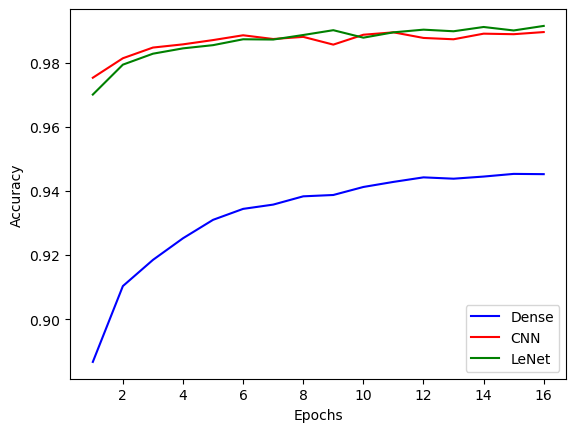

In [9]:
val_acc_dense = training_history_dense.history['val_accuracy']
val_acc_cnn = training_history_cnn.history['val_accuracy']

# Labels des axes
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Courbe du score de test du réseau Dense
plt.plot(np.arange(1 , 17, 1),
         val_acc_dense,
         label = 'Dense',
         color = 'blue')

# Courbe du score de test du réseau CNN
plt.plot(np.arange(1 , 17, 1),
         val_acc_cnn, 
         label = 'CNN',
         color = 'red')

# Courbe du score de test du réseau LeNet
plt.plot(np.arange(1 , 17, 1),
         val_acc_lenet, 
         label = 'LeNet',
         color = 'green')

# Affichage de la légende
plt.legend()

# Affichage de la figure
plt.show()


In [10]:
test_pred_lenet = lenet.predict(X_test)
test_pred_dense = model_dense.predict(X_test)
test_pred_cnn = model_cnn.predict(X_test)

test_pred_lenet_class = test_pred_lenet.argmax(axis = 1)
test_pred_dense_class = test_pred_dense.argmax(axis = 1)
test_pred_cnn_class = test_pred_cnn.argmax(axis = 1)
y_test_class = y_test.argmax(axis = 1)


313/313 [==============================] - 4s 11ms/step


In [11]:
print(metrics.classification_report(y_test_class, test_pred_lenet_class))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



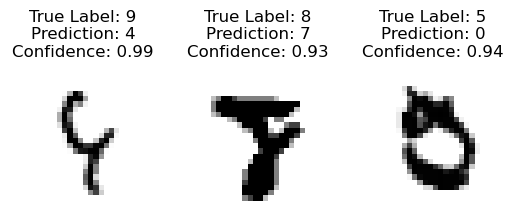

In [12]:
error_indexes = []
for i in range(len(test_pred_cnn)):
    if (test_pred_lenet_class[i] != y_test_class[i]):
        if(test_pred_dense_class[i] != y_test_class[i]):
            if(test_pred_cnn_class[i] != y_test_class[i]):
                error_indexes += [i]

j = 1
for i in np.random.choice(error_indexes, size = 3):
    img = X_test[i] 
    img = img.reshape(28, 28)
    
    plt.subplot(1, 3, j)
    j = j + 1
    plt.axis('off')
    plt.imshow(img,cmap = cm.binary, interpolation='None')
    plt.title('True Label: ' + str(y_test_class[i]) \
              + '\n' + 'Prediction: '+ str(test_pred_lenet_class[i]) \
              + '\n' + 'Confidence: '+ str(round(test_pred_lenet[i][test_pred_lenet_class[i]], 2)))


On remarque que certains des chiffres mal identifiés sont parfois très mal écrits, certains ne sont même pas reconnaissables.

Avec un taux de précision dépassant les 99% pour quelques minutes d'entraînement, on peut affirmer qu'au moins un des trois modèles a rempli son objectif.